## 画像拡張

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

### 画像の読み込み

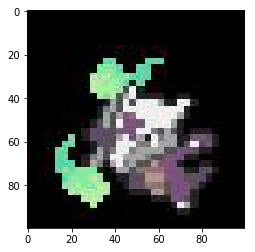

In [137]:
img = cv2.imread("./dataset/105-1.jpg")
plt.imshow(img)

### 画像をnumpy配列に変換

In [71]:
npimg = np.array(img)

### グレースケール画像の作成

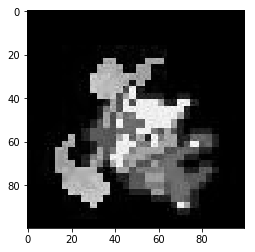

In [72]:
meanimg = np.mean(npimg, axis=2)
grayimg = np.zeros_like(npimg)
for i in range(3):
    grayimg[:,:,i] = meanimg
plt.imshow(grayimg)

In [102]:
dst = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

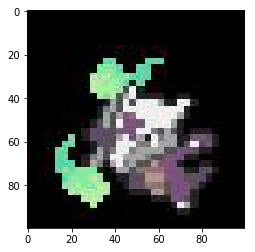

In [103]:
plt.imshow(img)

### 輝度(彩度)

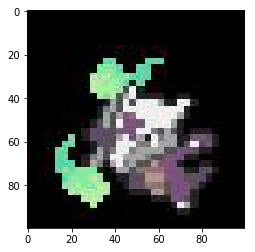

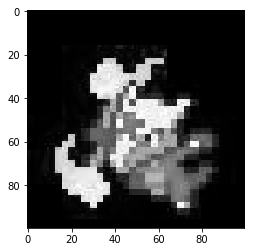

In [116]:
dst = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
for i in range(dst.shape[0]):
    for j in range(dst.shape[1]):
        # Vの値を上書きする
        dst[i, j, 1] = int(dst[i, j, 1] * 0)

img2 = cv2.cvtColor(dst, cv2.COLOR_HSV2RGB)  # HSVからBGRに戻す
plt.imshow(img)
plt.figure()
plt.imshow(img2)
# cv2.imwrite('images/result.jpg', img)
# cv2.waitKey(0)

### 傾きの変換(アフィン変換)

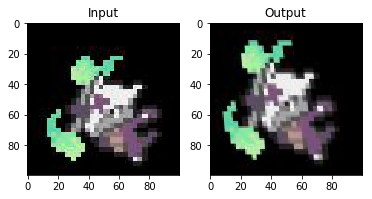

In [130]:
rows,cols,ch = img.shape

pts1 = np.float32([[20,20],[80,20],[50,100]])
pts2 = np.float32([[10,10],[70,10],[50,100]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### 画像縮小(アフィン変換)

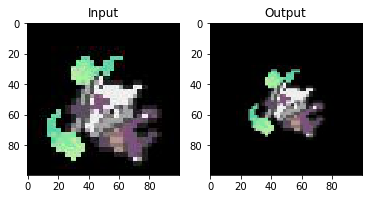

In [132]:
rows,cols,ch = img.shape

pts1 = np.float32([[20,20],[80,20],[50,100]])
pts2 = np.float32([[30,30],[70,30],[50,80]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### 画像の一部をマスク

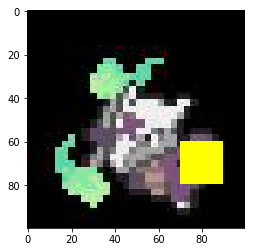

In [147]:
maskedimg = np.copy(img)
maskedimg[60:80,70:90,:] = np.array([255,255,0])
plt.imshow(maskedimg)

### 画像の反転とか

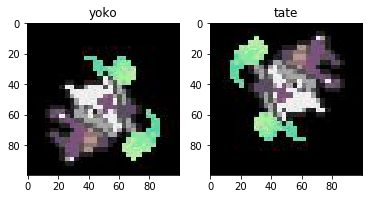

In [152]:
mirrorW = img[:,::-1,:]
mirrorH = img[::-1,:,:]

plt.subplot(121),plt.imshow(mirrorW),plt.title('yoko')
plt.subplot(122),plt.imshow(mirrorH),plt.title('tate')
plt.show()